# Customer Profiling

1. Import Libraries and Data
2. Data Security Concerns - Names
3. Regional Customer Behaviour
4. Flag Low Activity customers and exclude from the dataset
5. Demographic Profiles: Income and Life Status
6. Comparing Profiles and Regions
7. Comparing Profiles across departments

# 01. Import Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [68]:
path = r'C:\Users\lizan\Desktop\Data Analytics\4.0\31-05-2022 Instacart Basket Analysis'

In [3]:
ords_prods_cx = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merged.pkl'))

In [4]:
ords_prods_cx.shape

(32404859, 34)

In [5]:
ords_prods_cx.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
ords_prods_cx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_time              int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  Busiest_Day             object  
 16  Busiest_Days            object  
 17  Busiest_Hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_spend               float64 
 21  spend_

# 02. Security Concerns

The customer's full names are present in the data along with some personal information.  For this analysis, specific customer names are not required and therefore will be dropped from the data set

In [7]:
# Drop customer's name variables
ords_prods_cx = ords_prods_cx.drop(columns = ['First Name','Surnam'])

# 03. Regional Customer Behaviour

In [8]:
# Create a new column with the Region variable
result = []

for value in ords_prods_cx['STATE']:
            if value == 'Maine':
                    result.append('Northeast')
            elif value == 'New Hampshire':
                    result.append('Northeast')
            elif value == 'Vermont':
                    result.append('Northeast')
            elif value == 'Massachusetts':
                    result.append('Northeast')
            elif value == 'Rhode Island':
                    result.append('Northeast')
            elif value == 'Connecticut':
                    result.append('Northeast')
            elif value == 'New York':
                    result.append('Northeast')
            elif value == 'Pennsylvania':
                    result.append('Northeast')
            elif value == 'New Jersey':
                    result.append('Northeast')
            elif value == 'Wisconsin':
                    result.append('Midwest')
            elif value == 'Michigan':
                    result.append('Midwest')
            elif value == 'Illinois':
                    result.append('Midwest')
            elif value == 'Indiana':
                    result.append('Midwest')
            elif value == 'Ohio':
                    result.append('Midwest')
            elif value == 'North Dakota':
                    result.append('Midwest')
            elif value == 'South Dakota':
                    result.append('Midwest')
            elif value == 'Nebraska':
                    result.append('Midwest')
            elif value == 'Kansas':
                    result.append('Midwest')
            elif value == 'Minnesota':
                    result.append('Midwest')
            elif value == 'Iowa':
                    result.append('Midwest')
            elif value == 'Missouri':
                    result.append('Midwest')
            elif value == 'Delaware':
                    result.append('South')
            elif value == 'Maryland':
                    result.append('South')
            elif value == 'District of Columbia':
                    result.append('South')
            elif value == 'Virginia':
                    result.append('South')
            elif value == 'West Virginia':
                    result.append('South')
            elif value == 'North Carolina':
                    result.append('South')
            elif value == 'South Carolina':
                    result.append('South')
            elif value == 'Georgia':
                    result.append('South')
            elif value == 'Florida':
                    result.append('South')
            elif value == 'Kentucky':
                    result.append('South')
            elif value == 'Tennessee':
                    result.append('South')
            elif value == 'Mississippi':
                    result.append('South')                            
            elif value == 'Alabama':
                    result.append('South')
            elif value == 'Oklahoma':
                    result.append('South')
            elif value == 'Texas':
                    result.append('South')
            elif value == 'Arkansas':
                    result.append('South')
            elif value == 'Louisiana':
                    result.append('South')
            elif value == 'Idaho':
                    result.append('West')
            elif value == 'Montana':
                    result.append('West')
            elif value == 'Wyoming':
                    result.append('West')               
            elif value == 'Nevada':
                    result.append('West')
            elif value == 'Utah':
                    result.append('West')
            elif value == 'Colorado':
                    result.append('West')
            elif value == 'Arizona':
                    result.append('West')
            elif value == 'New Mexico':
                    result.append('West')
            elif value == 'Alaska':
                    result.append('West')
            elif value == 'Washington':
                    result.append('West')
            elif value == 'Oregon':
                    result.append('West')
            elif value == 'California':
                    result.append('West')
            elif value == 'Hawaii':
                    result.append('West')

In [9]:
ords_prods_cx['Region'] = result

In [10]:
ords_prods_cx['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [12]:
# Crosstab to compare spending per region
crosstab = pd.crosstab(ords_prods_cx['Region'], ords_prods_cx['spend_type'])

In [13]:
crosstab.to_clipboard()

The majority of customers in each Region are Low Spenders.

# 04. Flag Low Activity Customers and Exclude 

In [19]:
# Add order activity flag
ords_prods_cx.loc[ords_prods_cx['max_order'] < 5, 'activity flag'] = 'Low Activity'

In [20]:
ords_prods_cx.loc[ords_prods_cx['max_order'] >= 5, 'activity flag'] = 'High Activity'

In [24]:
ords_prods_cx['activity flag'].value_counts()

High Activity    30964564
Low Activity      1440295
Name: activity flag, dtype: int64

In [26]:
# Create a subset to exclude low activity users
ords_prods_cx_active = ords_prods_cx[ords_prods_cx['activity flag']=='High Activity']

In [27]:
ords_prods_cx_active.shape

(30964564, 34)

In [28]:
ords_prods_cx_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_activecx.pkl'))

# 05. Demographic Profiles

In [4]:
ords_prods_cx = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_activecx.pkl'))

Create profiles based on age, income, depentdents and product types to identify demographics for targeted adds
1. Single Adults with out kids:  fam_status = single, age > 18, n_dependents = 0
2. Young Parents: age 18 - 35, n_dependents > 0
3. Middle Aged: age 40 to 65
4. Seniors: age >= 65

1. Low Income: income < 42000
2. Middle Income: income between 42000 and 126000
3. High Income: income > 126000

In [7]:
# Income profiling - Low Income
ords_prods_cx.loc[ords_prods_cx['income'] <= 42000, 'income_profile'] = 'Low Income'

In [8]:
ords_prods_cx.loc[(ords_prods_cx['income'] > 42000) & (ords_prods_cx['income'] <= 126000), 'income_profile'] = 'Middle Income'

In [9]:
ords_prods_cx.loc[ords_prods_cx['income'] > 126000, 'income_profile'] = 'High Income'

In [10]:
ords_prods_cx['income_profile'].value_counts()

Middle Income    20933692
High Income       8108203
Low Income        1922669
Name: income_profile, dtype: int64

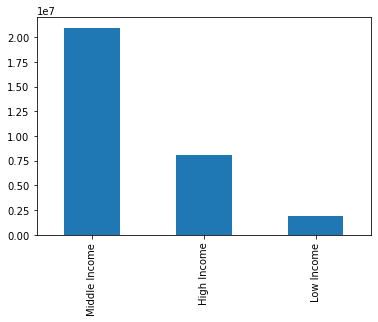

In [11]:
bar = ords_prods_cx['income_profile'].value_counts().plot.bar()

In [13]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_profile.png'))

In [14]:
ords_prods_cx.groupby('income_profile').agg({'avg_spend': ['mean','min', 'max']})

avg_spend                   
                     mean  min           max
income_profile                              
High Income     21.426158  7.0  15006.940000
Low Income       6.521898  1.0     11.857143
Middle Income    8.753792  1.0   5135.893590

In [16]:
ords_prods_cx.groupby('income_profile').agg({'prices': ['sum']})

,prices
,sum
income_profile,
High Income,64439196.5
Low Income,12539452.0
Middle Income,164215587.1


In [20]:
ords_prods_cx.groupby('income_profile').agg({'orders_day_of_week': ['median','mean']})

orders_day_of_week          
                           median      mean
income_profile                             
High Income                   3.0  2.744047
Low Income                    3.0  2.738527
Middle Income                 3.0  2.740634

In [21]:
ords_prods_cx.groupby('income_profile').agg({'order_time': ['median','mean']})

order_time           
                   median       mean
income_profile                      
High Income          13.0  13.449492
Low Income           13.0  13.180856
Middle Income        13.0  13.417201

In [30]:
# Profile by life status
ords_prods_cx.loc[(ords_prods_cx['fam_status'] == 'single') & (ords_prods_cx['Age'] > 18) & (ords_prods_cx['n_dependants'] == 0), 'life_profile'] = 'Single No Kids'

In [31]:
ords_prods_cx.loc[(ords_prods_cx['Age'] >= 40) & (ords_prods_cx['Age'] < 65), 'life_profile'] = 'Middle Aged'

In [32]:
ords_prods_cx.loc[(ords_prods_cx['Age'] >= 18) & (ords_prods_cx['Age'] < 35) & (ords_prods_cx['n_dependants'] > 0), 'life_profile'] = 'Young Parents'

In [33]:
ords_prods_cx.loc[ords_prods_cx['Age'] >= 65, 'life_profile'] = 'Senior'

In [34]:
ords_prods_cx['life_profile'].value_counts()

Middle Aged       12103910
Senior             8195544
Young Parents      6178737
Single No Kids     2541320
Name: life_profile, dtype: int64

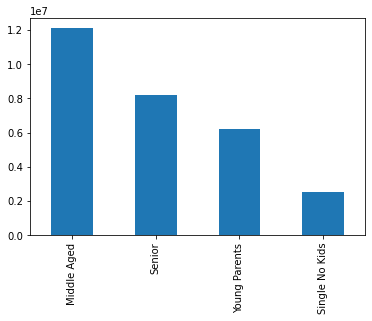

In [35]:
bar = ords_prods_cx['life_profile'].value_counts().plot.bar()

In [36]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_life_profile.png'))

In [37]:
ords_prods_cx.groupby('life_profile').agg({'prices': ['sum','mean','min', 'max']})

prices                     
                       sum      mean  min   max
life_profile                                   
Middle Aged     94292932.7  7.791529  1.0  25.0
Senior          63888366.2  7.796715  1.0  25.0
Single No Kids  19770461.3  7.780709  1.0  25.0
Young Parents   48101520.1  7.786299  1.0  25.0

In [38]:
ords_prods_cx.groupby('life_profile').agg({'order_time': ['median','mean']})

order_time           
                   median       mean
life_profile                        
Middle Aged          13.0  13.420149
Senior               13.0  13.412806
Single No Kids       13.0  13.400129
Young Parents        13.0  13.389479

In [39]:
ords_prods_cx.groupby('life_profile').agg({'orders_day_of_week': ['median','mean']})

orders_day_of_week          
                           median      mean
life_profile                               
Middle Aged                   3.0  2.744650
Senior                        3.0  2.747122
Single No Kids                3.0  2.721996
Young Parents                 3.0  2.738144

In [41]:
crosstab = pd.crosstab(ords_prods_cx['life_profile'], ords_prods_cx['spend_type'])

In [42]:
crosstab.to_clipboard()

In [43]:
crosstab = pd.crosstab(ords_prods_cx['life_profile'], ords_prods_cx['loyalty_flag'])

In [44]:
crosstab.to_clipboard()

In [45]:
crosstab = pd.crosstab(ords_prods_cx['income_profile'], ords_prods_cx['spend_type'])

In [46]:
crosstab.to_clipboard()

In [47]:
crosstab = pd.crosstab(ords_prods_cx['income_profile'], ords_prods_cx['loyalty_flag'])

In [48]:
crosstab.to_clipboard()

In [49]:
ords_prods_cx.groupby('life_profile').agg({'median_order_frequency': ['mean','min', 'max']})

median_order_frequency           
                                 mean  min   max
life_profile                                    
Middle Aged                  9.980707  0.0  30.0
Senior                       9.933025  0.0  30.0
Single No Kids              10.029734  0.0  30.0
Young Parents                9.931626  0.0  30.0

In [50]:
ords_prods_cx.groupby('income_profile').agg({'median_order_frequency': ['mean','min', 'max']})

median_order_frequency           
                                 mean  min   max
income_profile                                  
High Income                  9.867302  0.0  30.0
Low Income                  10.634684  0.0  30.0
Middle Income                9.929707  0.0  30.0

In [51]:
ords_prods_cx.groupby('life_profile').agg({'avg_spend': ['mean','min', 'max']})

avg_spend                        
                     mean       min           max
life_profile                                     
Middle Aged     11.944899  1.000000  15006.940000
Senior          11.757768  1.262500  14042.512281
Single No Kids  11.871863  1.800000   8794.882427
Young Parents   12.113719  1.628571  10209.987755

# 06. Comparing profiles and regions

In [54]:
# Create crosstab subset to compare region and life profiles
region_profiles = pd.crosstab(ords_prods_cx['Region'], ords_prods_cx['life_profile'], dropna = False)

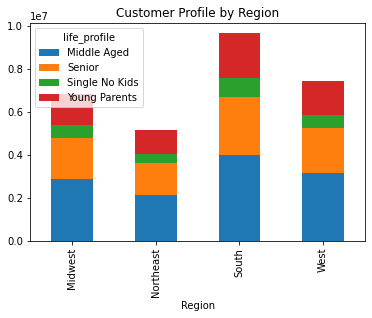

In [55]:
rp_bar = region_profiles.plot(kind='bar', stacked=True, title='Customer Profile by Region')

In [57]:
rp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_life_profile.png'))

In [58]:
region_income = pd.crosstab(ords_prods_cx['Region'], ords_prods_cx['income_profile'], dropna = False)

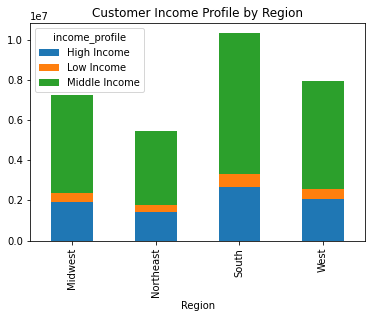

In [72]:
rip_bar = region_income.plot(kind='bar', stacked=True, title='Customer Income Profile by Region')

In [73]:
rip_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income_profile.png'))

# 07. Comparing Profiles across Departments

In [61]:
# Create crosstab subset to compare departments and life profiles
dept_profiles = pd.crosstab(ords_prods_cx['department_id'], ords_prods_cx['life_profile'], dropna = False)

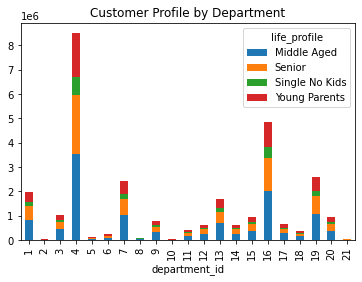

In [62]:
dp_bar = dept_profiles.plot(kind='bar', stacked=True, title='Customer Profile by Department')

In [64]:
dp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_life_profile.png'))

In [63]:
# Create crosstab subset to compare departments and income profiles
dept_iprofiles = pd.crosstab(ords_prods_cx['department_id'], ords_prods_cx['income_profile'], dropna = False)

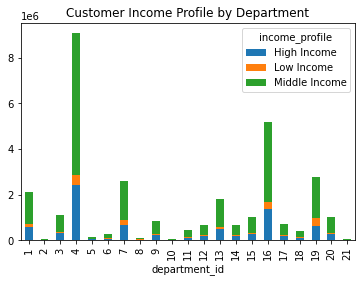

In [65]:
dip_bar = dept_iprofiles.plot(kind='bar', stacked=True, title='Customer Income Profile by Department')

In [66]:
dip_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_life_profile.png'))

In [70]:
# Export
ords_prods_cx.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_final.pkl'))

In [71]:
ords_prods_cx.shape

(30964564, 36)

In [74]:
crosstab = pd.crosstab(ords_prods_cx['Region'], ords_prods_cx['loyalty_flag'])

In [75]:
crosstab.to_clipboard()